In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("../outputs/indicateurs_simplifies.csv")

In [21]:
# Cible
y = df["Taux de mortalité prématurée (2023)"]

# Variables explicatives
X = df[[
    "Taux de pauvreté(2023)",
    "Moyenne bénéficiaires CSS (2023)",
    "Densité de médecins généralistes 100 000 habitants"
]]


In [22]:
# Création du modèle
model = LinearRegression()

# Entraînement
model.fit(X, y)


LinearRegression()

In [23]:
# Prédictions
y_pred = model.predict(X)

# Score R²
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)

# Résultat des coefficients
print("📊 Coefficients de régression :")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  - {feature} : {coef:.4f}")

print(f"\n🎯 R² (coefficient de détermination) : {r2:.3f}")


📊 Coefficients de régression :
  - Taux de pauvreté(2023) : 0.2214
  - Moyenne bénéficiaires CSS (2023) : -0.0000
  - Densité de médecins généralistes 100 000 habitants : -0.0032

🎯 R² (coefficient de détermination) : 1.000


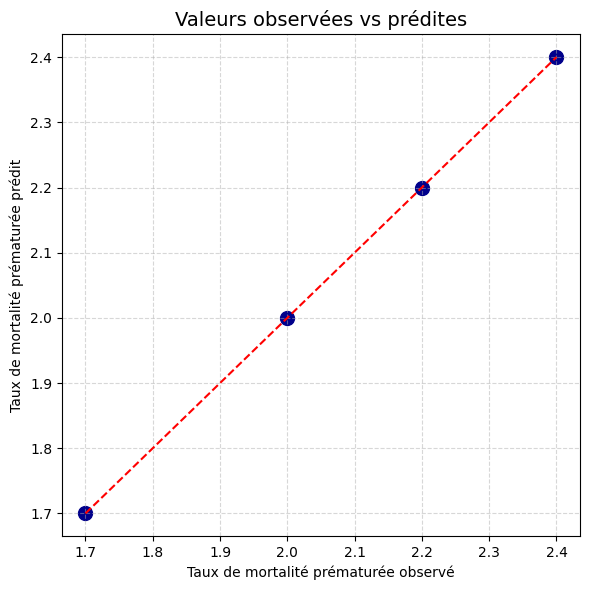

In [24]:
# 📈 Scatterplot : Valeurs observées vs prédites
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, color="darkblue", s=100)

# Ligne de référence y = x
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")

plt.title("Valeurs observées vs prédites", fontsize=14)
plt.xlabel("Taux de mortalité prématurée observé")
plt.ylabel("Taux de mortalité prématurée prédit")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

